In [5]:
import cv2
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

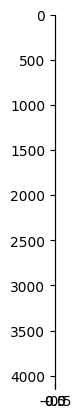

In [20]:
img = cv2.imread(r"C:\Users\sumit\Desktop\Code\Project\Image classification\Model\test_image\57.png")

scalled_raw_img = cv2.resize(img, (32, 32))
img_har = w2d(img,'db1',5)
scalled_img_har = cv2.resize(img_har, (32, 32))
combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
plt.imshow(combined_img)